# Importando bibliotecas e Dataset

In [1]:
# Instalação das bibliotecas necessárias
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importando Dataset
df = pd.read_csv('ufo_sighting_data.csv')
df.head()


C:\Users\Ian\AppData\Local\Temp\ipykernel_36740\1540245308.py:8: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ufo_sighting_data.csv')


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


# Informações do DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date_time                        80332 non-null  object 
 1   city                             80332 non-null  object 
 2   state/province                   74535 non-null  object 
 3   country                          70662 non-null  object 
 4   UFO_shape                        78400 non-null  object 
 5   length_of_encounter_seconds      80332 non-null  object 
 6   described_duration_of_encounter  80332 non-null  object 
 7   description                      80317 non-null  object 
 8   date_documented                  80332 non-null  object 
 9   latitude                         80332 non-null  object 
 10  longitude                        80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [4]:
# Checando países com aparições mais frequentes e ordenando de forma decrescente
df['country'].value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [5]:
# Checando quantidade de formatos diferentes de OVNI
len(df['UFO_shape'].value_counts().unique())

24

# Limpeza

In [6]:
# Removendo valores nulos
df = df[df['country'].notnull()]
df = df[df['UFO_shape'].notnull()]
df.shape

(69001, 11)

In [7]:
# Sem valores nulos na coluna UFO_shape
df[df['UFO_shape'].isnull()]


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude


In [8]:
# Sem valores nulos na coluna Country
df[df['country'].isnull()]

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude


# Análise

In [9]:
# Relação entre país de avistamento e quantidade de aparição de cada formato do OVNI 

contingencytab = pd.crosstab(df['country'],df['UFO_shape'])
contingencytab

UFO_shape,changed,changing,chevron,cigar,circle,cone,crescent,cross,cylinder,delta,...,light,other,oval,pyramid,rectangle,round,sphere,teardrop,triangle,unknown
country,,,,,,,,,,,,,,,,,,,,,
au,0,9,3,15,62,6,0,1,9,0,...,119,40,30,0,10,0,15,10,43,25
ca,0,69,36,74,284,10,0,9,53,1,...,655,241,130,0,47,0,205,22,268,207
de,0,2,1,3,10,0,0,0,3,0,...,20,9,7,0,1,0,7,0,9,8
gb,0,46,8,60,243,13,0,10,30,0,...,361,133,86,0,29,0,158,38,169,92
us,1,1584,815,1643,6118,247,1,188,1027,6,...,13473,4466,3032,1,1070,2,4347,592,6549,4567


# Formatos de OVNI

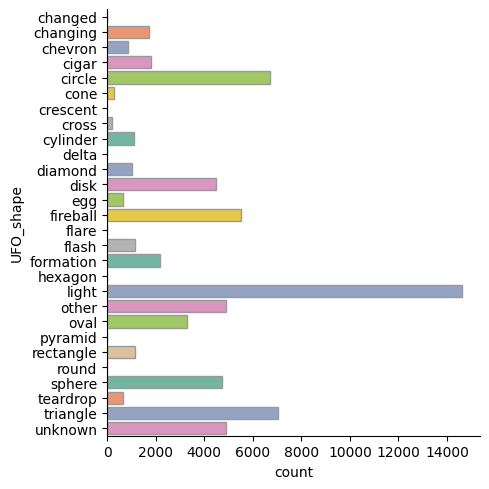

In [10]:
# Formatos de UFO

sns.catplot(y="UFO_shape", kind="count",
            palette="Set2", edgecolor=".6",
            data=df.sort_values("UFO_shape"))


# Formatos de OVNI nos 5 países com maior número de aparição

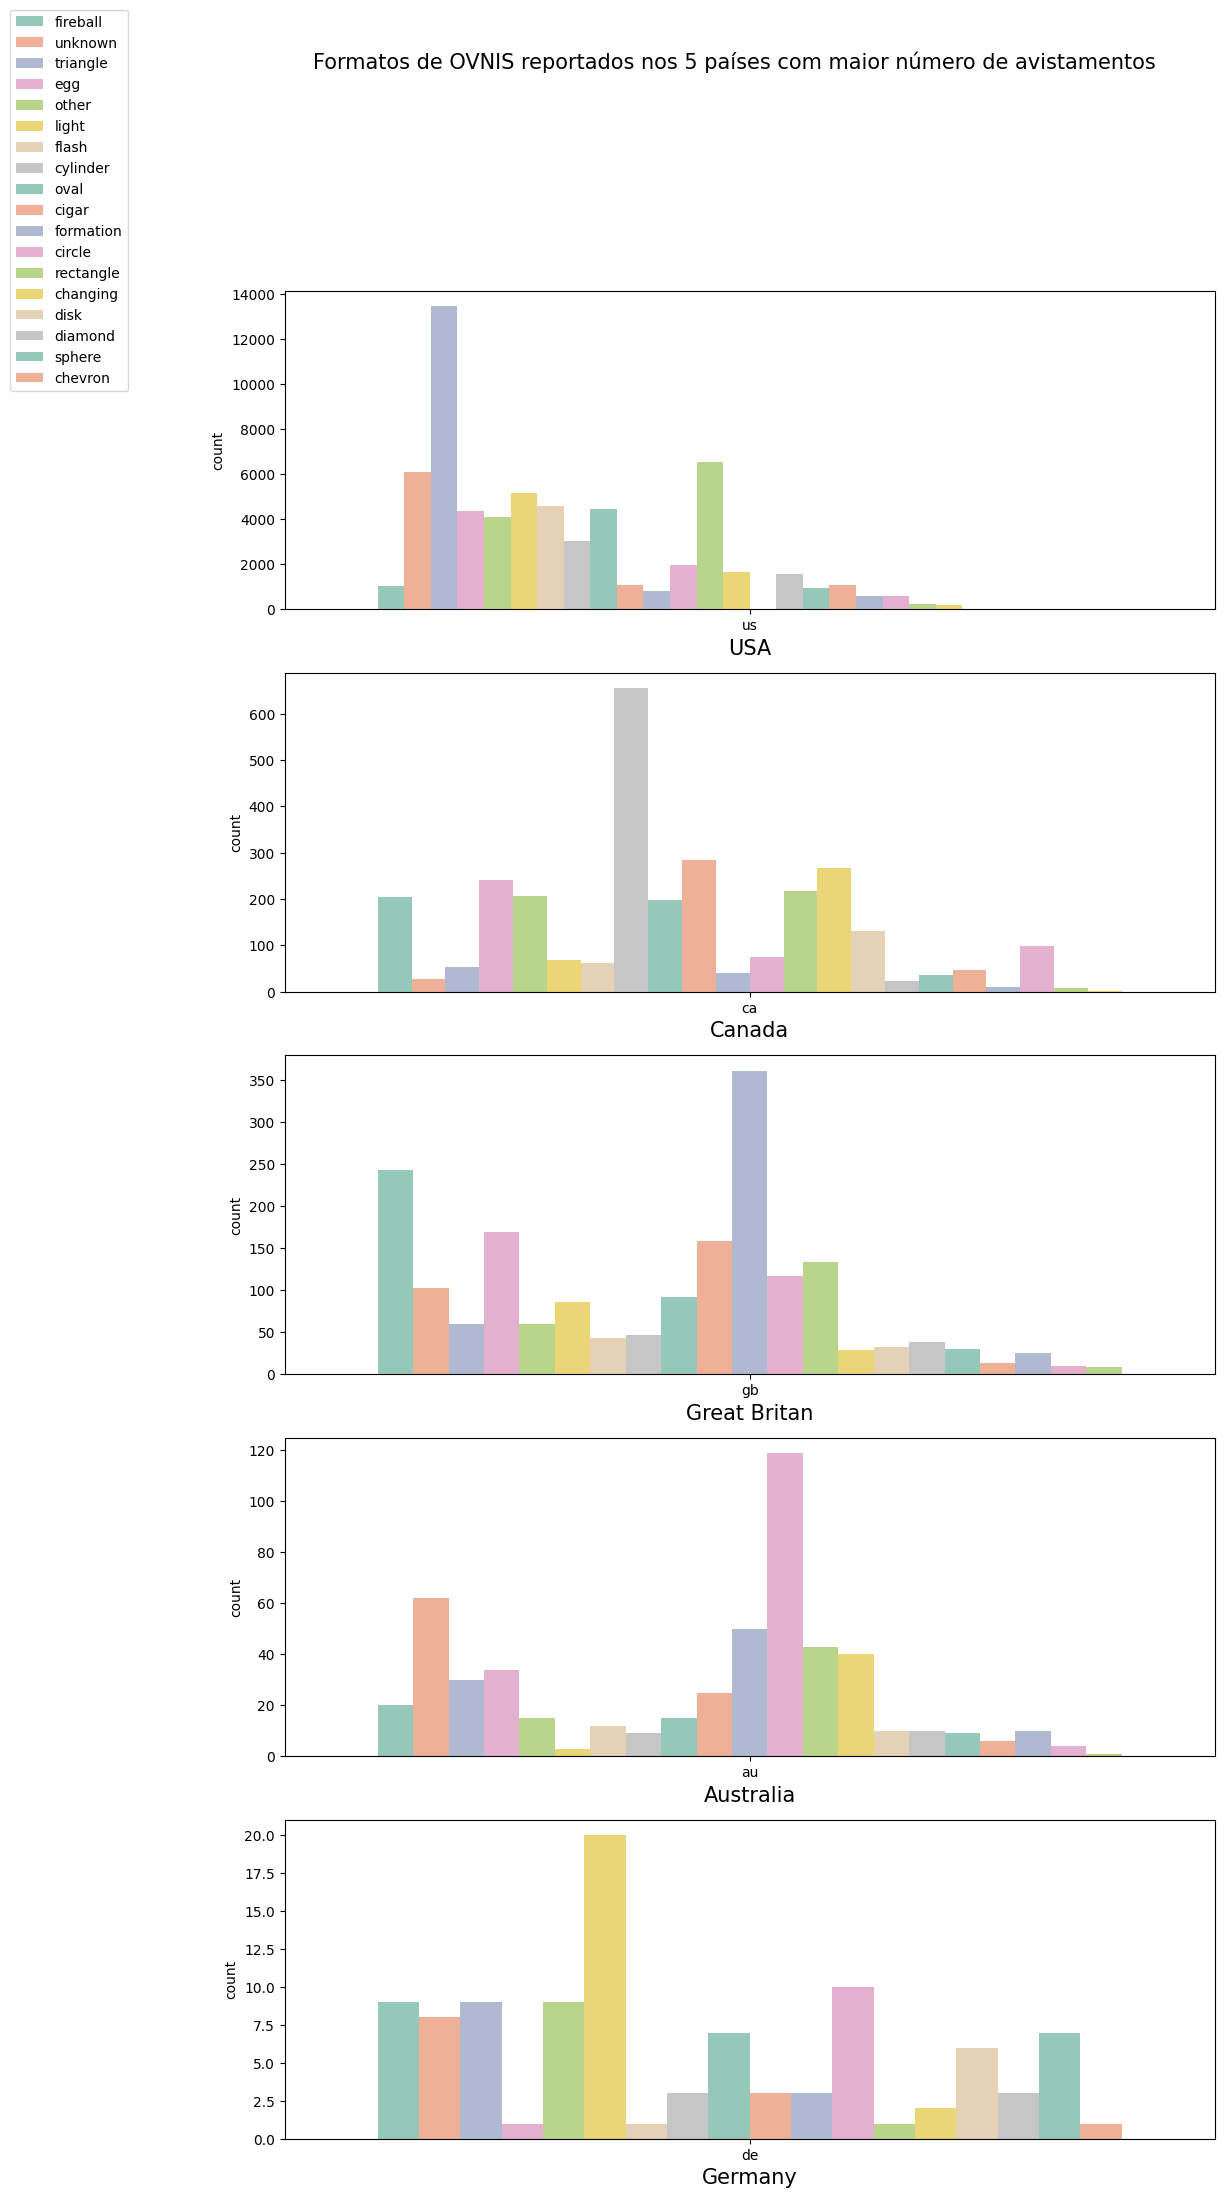

In [14]:
# Criando gráfico com 5 subplots, um para cada país
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 24))

# Para cada subplot, criei um countplot dos formatos de OVNI mais avistados no país
# Filtrei os dados por país usando a syntax df[df['country']==country_code] 
sns.countplot(x='country', hue='UFO_shape', data=df[df['country']=='us'], ax=ax1, palette='Set2', alpha=.75)
sns.countplot(x='country', hue='UFO_shape', data=df[df['country']=='ca'], ax=ax2, palette='Set2', alpha=.75)
sns.countplot(x='country', hue='UFO_shape', data=df[df['country']=='gb'], ax=ax3, palette='Set2', alpha=.75)
sns.countplot(x='country', hue='UFO_shape', data=df[df['country']=='au'], ax=ax4, palette='Set2', alpha=.75)
sns.countplot(x='country', hue='UFO_shape', data=df[df['country']=='de'], ax=ax5, palette='Set2', alpha=.75)

# Removendo as legendas pra aprimorar visualização
ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()
ax5.legend_.remove()

# Setando o xlabel de cada subplot para o país correspondente
ax1.set_xlabel('USA', fontsize=15)
ax2.set_xlabel('Canada', fontsize=15)
ax3.set_xlabel('Great Britan', fontsize=15)
ax4.set_xlabel('Australia', fontsize=15)
ax5.set_xlabel('Germany', fontsize=15)

# Adicionando legenda para todas as subplots no topo do gráfico
plt.legend(bbox_to_anchor=(0,1), bbox_transform=fig.transFigure)

# Adicionando título
fig.suptitle('Formatos de OVNIS reportados nos 5 países com maior número de avistamentos', fontsize=15);

# Avistamento de OVNI por Estado

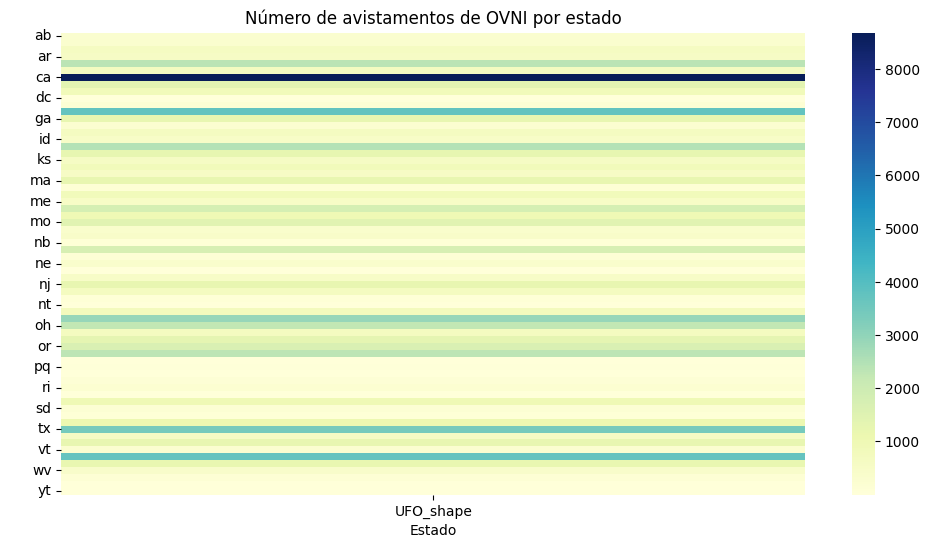

In [12]:
# Tabela dinâmica para contar o número de avistamentos em cada estado
sightings_by_state = df.pivot_table(index='state/province', values='UFO_shape', aggfunc='count')

# Criação do mapa de calor usando o seaborn
plt.figure(figsize=(12,6))
sns.heatmap(sightings_by_state, cmap='YlGnBu')
plt.title('Número de avistamentos de OVNI por estado')
plt.xlabel('Estado')
plt.ylabel(' ')
plt.show()